### Install Libraries

In [75]:
# !pip install seaborn matplotlib
# !pip install scikit-learn

In [76]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-01-23 21:50:04.279667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14745752655416590992,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 32477282304
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 338621968156256318
 physical_device_desc: "device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0"]

### 꽃 판별 CNN Keras

In [77]:
import os
print(os.listdir('./data/Flowers299'))

['Kniphofia', 'ForgetMeNot', 'Zinnia', 'IcelandPoppy', 'Pinks', 'Alchemilla', 'Lavatera', 'Nemophila', 'Linaria', 'Penstemon', 'Celosia', 'Phlox', 'FlannelFlower', 'Clover', 'Dahlia', 'Magnolia', 'Impatiens', 'Clematis', 'Mayflower', 'BabyтАЩsBreath', 'Lupin', 'TeaRose', 'Hosta', 'PersianButtercup', 'PaintedDaisy', 'Bluebonnets', 'ShastaDaisy', 'Geranium', 'Eremurus', 'Heliotrope', 'Photinia', 'Cornflower', 'RockRose', 'Viburnum', 'Hibiscus', 'Snowdrop', 'Silene', 'Dianella', 'Broom', 'Parodia', 'Xerophyllum', 'Quince', 'OrientalPoppy', 'Pansy', 'Columbine', 'Verbena', 'Helenium', 'Candytuft', 'WaxPlant', 'ArmeriaMaritima', 'Chrysanthemum', 'Bergamot', 'Lotus', 'LadyтАЩsSlipper', 'Sage', 'Marigold', 'TigerFlower', 'PincushionFlower', 'Alstroemeria', 'Sedum', 'PeaceLily', 'BalloonFlower', 'CaliforniaPoppy', 'LemonVerbena', 'Sunflower', 'MorningGlory', 'Bouvardia', 'Corydalis', 'PowderPuff', 'PassionFlower', 'Wedelia', 'Winterberry', 'CrownImperial', 'Bellflower', 'Feverfew', 'Clarkia', 

### Importing Various Modules

In [78]:
# GPU 관련
import os
import tensorflow as tf

In [79]:
# warnings 처리를 위함
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [80]:
# 데이터 시각화를 위함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [81]:
# model selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [82]:
# preprocess
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [83]:
# keras 관련 라이브러리
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random, PIL

In [84]:
# CNN 관련 모듈
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

### Checking Data

In [85]:
flower_names = os.listdir('./data/Flowers299')
folder_dir = './data/Flowers299'
flower_names[0]

'Kniphofia'

In [86]:
# def changeName(path, cName):
#     i = 1
#     for filename in os.listdir(path):
#         print(path+filename, '=>', path+str(cName)+str(i)+'.jpg')
#         os.rename(path+filename, path+str(cName)+str(i)+'.jpg')
#         i += 1
 
# for foldername in os.listdir(folder_dir):
#   changeName('./data/Flowers299/' + foldername + '/', foldername)

### Loading Dataset

In [87]:
batch_size = 32
img_height = 128
img_width = 128
image_channel = 3
FAST_RUN = True

### 여기가 문제다.. 고치자...

In [88]:
import pandas as pd
import re

num = re.compile(r'\d+')
folder_names = os.listdir('./data/Flowers299')
flowers_df = pd.DataFrame()

def making_df(file_names, folder_names):
  categories = []
  for file_name in file_names:
    categories.append(num.sub('', file_name).split('.')[0])

  df = pd.DataFrame({
      'filename' : file_names,
      'category' : categories
  })
  df['filename'] = folder_names + '/' + df['filename']
  return df

for file_names in folder_names:  
  flowers_df = pd.concat([flowers_df, making_df(os.listdir('./data/Flowers299/' + file_names), file_names)]) 
  
flowers_df


,filename,category
0,Kniphofia/Kniphofia310.jpg,Kniphofia
1,Kniphofia/Kniphofia415.jpg,Kniphofia
2,Kniphofia/Kniphofia86.jpg,Kniphofia
3,Kniphofia/Kniphofia157.jpg,Kniphofia
4,Kniphofia/Kniphofia121.jpg,Kniphofia
...,...,...
403,Trollius/Trollius93.jpg,Trollius
404,Trollius/Trollius194.jpg,Trollius
405,Trollius/Trollius133.jpg,Trollius
406,Trollius/Trollius43.jpg,Trollius


<AxesSubplot:>

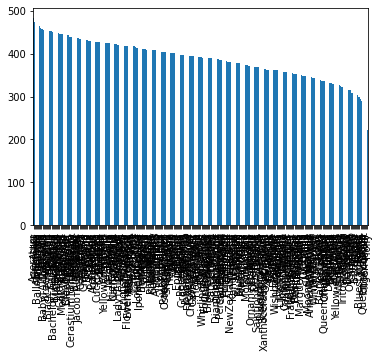

In [89]:
flowers_df['category'].value_counts().plot.bar()

In [90]:
# flower_path = './data/Flowers299/'
# folder_sample = random.choice(train_dr)
# train_dr2 = os.listdir(flower_path + folder_sample)
# flower_sample = random.choice(train_dr2)
# print(flower_sample)
# image = load_img(flower_path + folder_sample + '/' + flower_sample)
# plt.imshow(image)

In [91]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (3, 3),padding='same',activation='relu',input_shape=(img_width, img_height, image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(299, activation='softmax')) 

opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_16 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)       

In [92]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            min_delta=0,
                                            patience=10, 
                                            verbose=1, 
                                            mode='auto',
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [93]:
train_df, validate_df = train_test_split(flowers_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True) 

print(train_df,validate_df)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

                                 filename       category
0      PassionFlower/PassionFlower377.jpg  PassionFlower
1                        Hebe/Hebe324.jpg           Hebe
2                 Feverfew/Feverfew82.jpg       Feverfew
3      CrownImperial/CrownImperial387.jpg  CrownImperial
4      CrownImperial/CrownImperial439.jpg  CrownImperial
...                                   ...            ...
92750            Erigeron/Erigeron374.jpg       Erigeron
92751    WoollyViolet/WoollyViolet285.jpg   WoollyViolet
92752                  Roses/Roses101.jpg          Roses
92753                Zinnia/Zinnia288.jpg         Zinnia
92754      Xerophyllum/Xerophyllum246.jpg    Xerophyllum

[92755 rows x 2 columns]                                  filename       category
0                    Azalea/Azalea124.jpg         Azalea
1                  Olearia/Olearia281.jpg        Olearia
2         QueenтАЩsCup/QueenтАЩsCup23.jpg   QueenтАЩsCup
3                  Begonia/Begonia337.jpg        Begonia
4    

In [94]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    './data/Flowers299', 
    x_col='filename',
    y_col='category',
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size
)

Found 92755 validated image filenames belonging to 299 classes.


In [95]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./data/Flowers299",
    x_col='filename',
    y_col='category',
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size
)

Found 23189 validated image filenames belonging to 299 classes.


### 훈련 결과

Found 1 validated image filenames belonging to 1 classes.


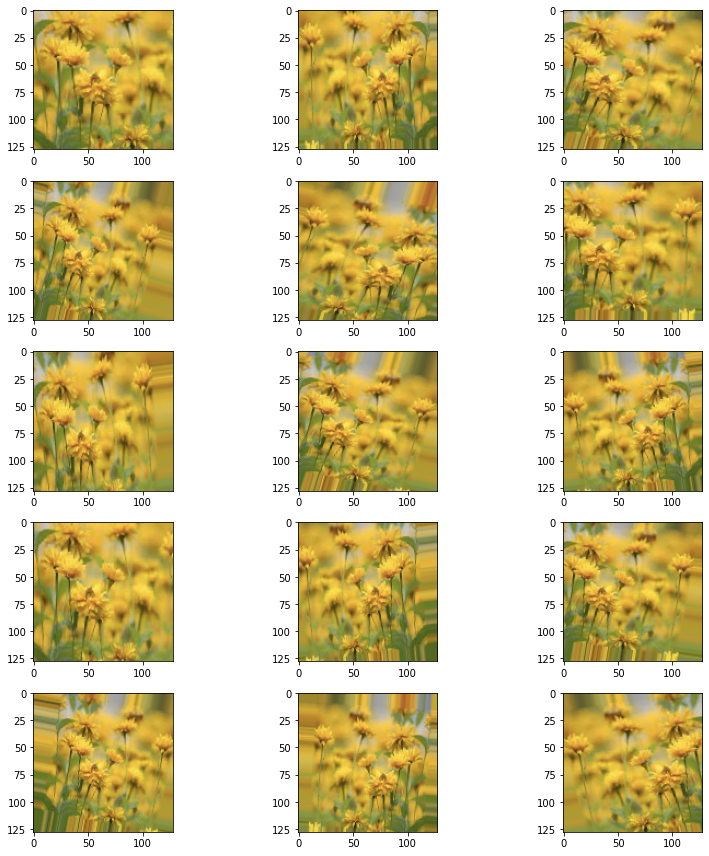

In [96]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./data/Flowers299", 
    x_col='filename',
    y_col='category',
    target_size=(img_width, img_height),
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### 훈련시작

In [100]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[callbacks]
)

Epoch 1/3
  21/2898 [..............................] - ETA: 6:25 - loss: 3.9432 - accuracy: 0.1622

KeyboardInterrupt: 

아니 이거 너무 느리다.. 아무래도 이 데이터프레임을 활용해서는 GPU가 인식을 안하는 것 같다... 하...